In [1]:
pip install statsmodels  prophet

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/brisbane water quality.zip')
data.shape

(30894, 20)

In [5]:
data.columns

Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]',
       'Temperature', 'Temperature [quality]', 'Dissolved Oxygen',
       'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)',
       'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]',
       'Salinity', 'Salinity [quality]', 'Specific Conductance',
       'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [8]:
data.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [9]:
#Missing Value
missing_val=data.isnull().sum()

In [10]:
missing_val

,0
Timestamp,0
Record number,0
Average Water Speed,20
Average Water Direction,1
Chlorophyll,585
Chlorophyll [quality],808
Temperature,5164
Temperature [quality],5344
Dissolved Oxygen,4300
Dissolved Oxygen [quality],4524


In [11]:
df=data.copy()

In [12]:
data.drop(["Chlorophyll [quality]","Temperature [quality]","Dissolved Oxygen [quality]","Dissolved Oxygen (%Saturation) [quality]","pH [quality]","Salinity [quality]","Specific Conductance [quality]","Turbidity [quality]"],inplace=True,axis=1)

In [13]:
data.set_index('Timestamp', inplace=True)

In [14]:
duplicate_timestamps = data.index[data.index.duplicated()]
duplicate_timestamps_count = duplicate_timestamps.size
print("\nNumber of duplicate timestamps:", duplicate_timestamps_count)


Number of duplicate timestamps: 280


In [15]:
if duplicate_timestamps_count > 0:
    print("\nDetails of duplicate timestamps and their records:")
    duplicates = data.loc[duplicate_timestamps]
    print(duplicates.head(10))  # Display the first 10 duplicates for brevity


Details of duplicate timestamps and their records:
                     Record number  Average Water Speed  \
Timestamp                                                 
2023-08-04 23:00:00           1468                4.834   
2023-08-04 23:00:00           1470                1.260   
2023-08-04 23:00:00           1472                3.397   
2023-08-04 23:00:00           1473                1.596   
2023-08-04 23:30:00           1469                2.544   
2023-08-04 23:30:00           1471                0.760   
2023-08-04 23:30:00           1474                6.622   
2023-08-04 23:00:00           1468                4.834   
2023-08-04 23:00:00           1470                1.260   
2023-08-04 23:00:00           1472                3.397   

                     Average Water Direction  Chlorophyll  Temperature  \
Timestamp                                                                
2023-08-04 23:00:00                   73.484        1.621       20.018   
2023-08-04 23:00:

In [16]:
for i in data.columns:
  print(f'{i}---No. of unique values: {data[i].nunique()} ')
print(f'No. of unique values in Timestamp: {data.index.nunique()}')
print("Rows in data: ",data.shape[0])

Record number---No. of unique values: 30894 
Average Water Speed---No. of unique values: 20817 
Average Water Direction---No. of unique values: 29250 
Chlorophyll---No. of unique values: 6966 
Temperature---No. of unique values: 10786 
Dissolved Oxygen---No. of unique values: 3114 
Dissolved Oxygen (%Saturation)---No. of unique values: 16473 
pH---No. of unique values: 456 
Salinity---No. of unique values: 8564 
Specific Conductance---No. of unique values: 11456 
Turbidity---No. of unique values: 7732 
No. of unique values in Timestamp: 30614
Rows in data:  30894


In [17]:
naive_data=data.copy()
#naive fillna by mean
naive_data=data.fillna(data.mean())

naive_data = naive_data.groupby(naive_data.index).mean()

The data has duplicate timestamp readings that might be the result of sensor errors or data recording issues.



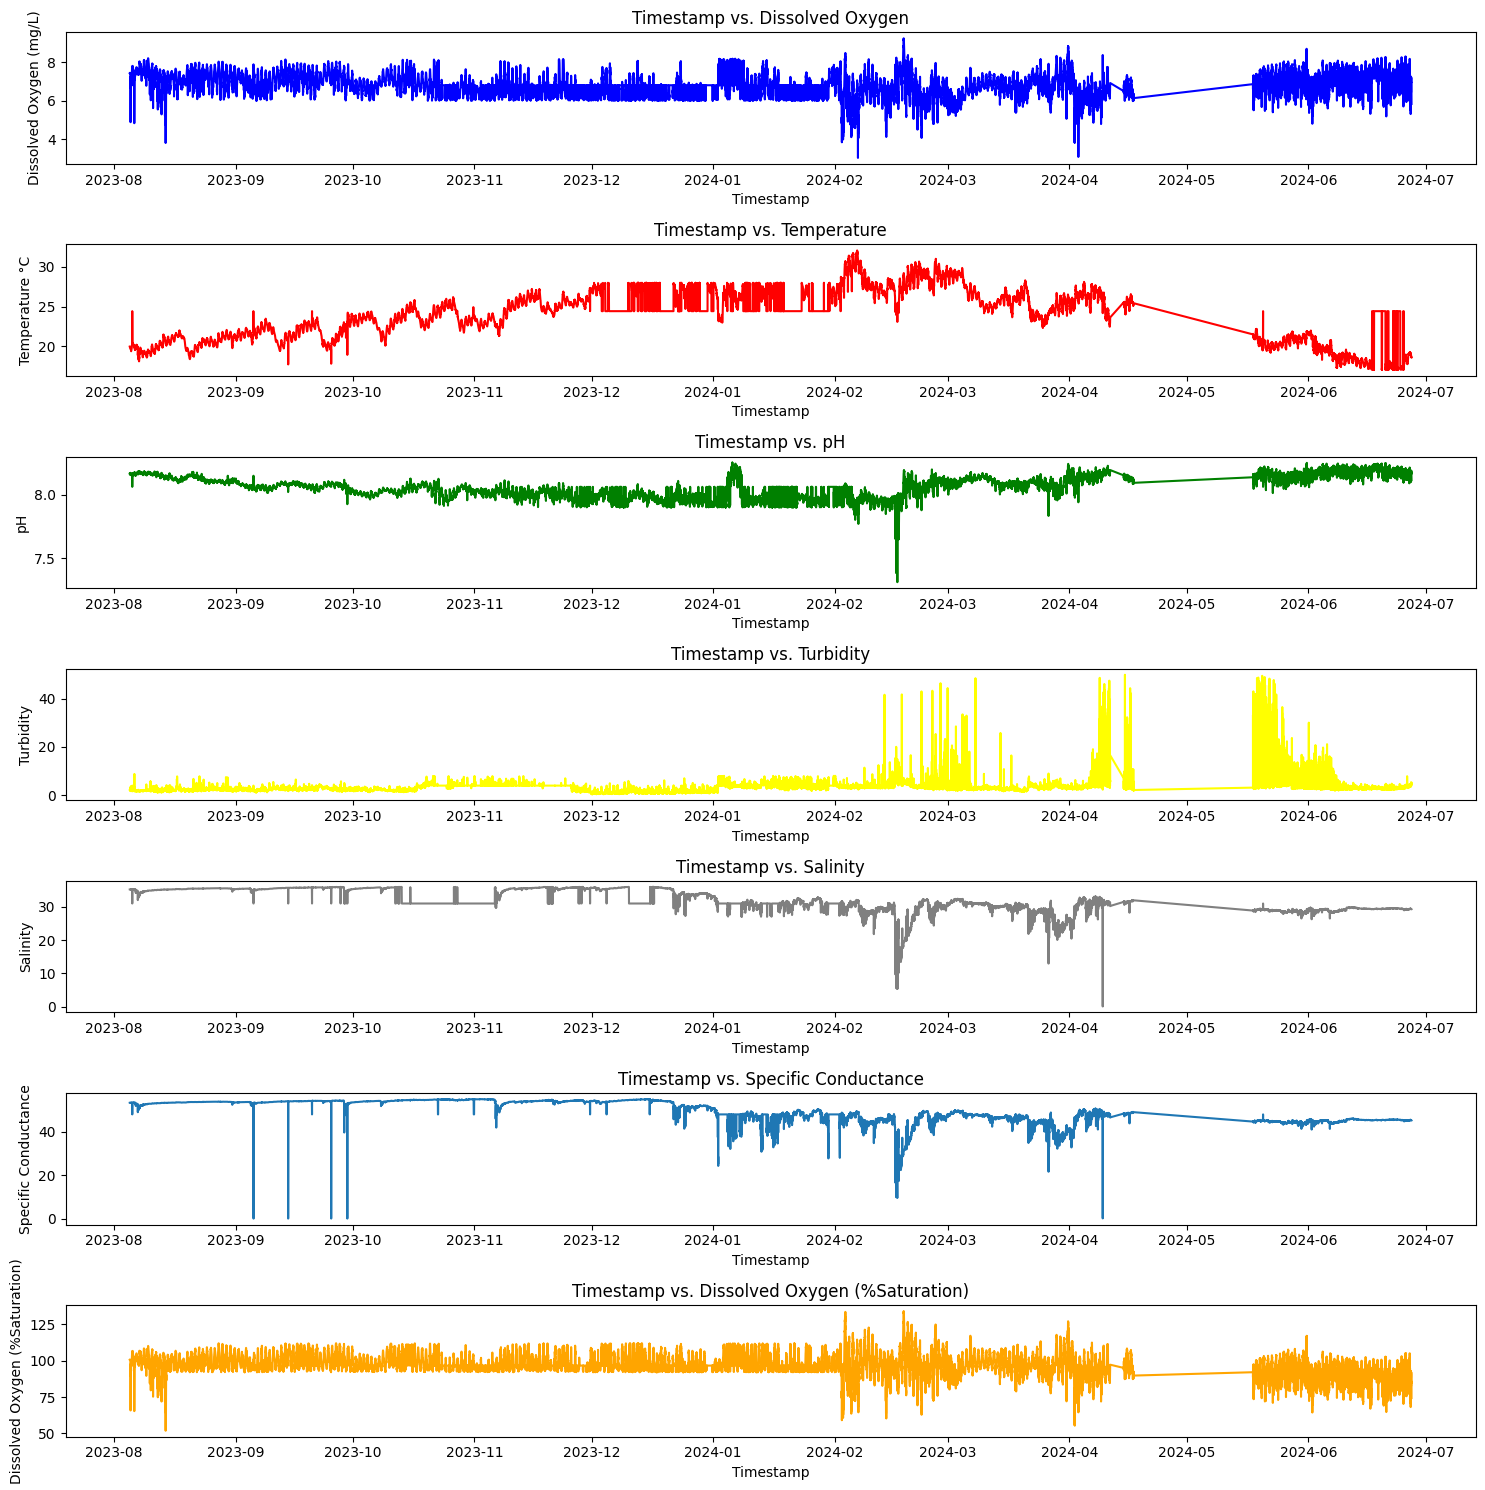

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(7,1,figsize=(15,15))


sns.lineplot(data=naive_data, x='Timestamp', y='Dissolved Oxygen', ax=axes[0],color='blue')
axes[0].set_title('Timestamp vs. Dissolved Oxygen')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Dissolved Oxygen (mg/L)')


sns.lineplot(data=naive_data, x='Timestamp', y='Temperature', ax=axes[1],color='red')
axes[1].set_title('Timestamp vs. Temperature')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Temperature °C')

sns.lineplot(data=naive_data, x='Timestamp', y='pH', ax=axes[2],color='green')
axes[2].set_title('Timestamp vs. pH')
axes[2].set_xlabel('Timestamp')
axes[2].set_ylabel('pH')


sns.lineplot(data=naive_data, x='Timestamp', y='Turbidity', ax=axes[3],color='yellow')
axes[3].set_title('Timestamp vs. Turbidity')
axes[3].set_xlabel('Timestamp')
axes[3].set_ylabel('Turbidity')


sns.lineplot(data=naive_data, x='Timestamp', y='Salinity', ax=axes[4],color='grey')
axes[4].set_title('Timestamp vs. Salinity')
axes[4].set_xlabel('Timestamp')
axes[4].set_ylabel('Salinity')


sns.lineplot(data=naive_data, x='Timestamp', y='Specific Conductance', ax=axes[5])
axes[5].set_title('Timestamp vs. Specific Conductance')
axes[5].set_xlabel('Timestamp')
axes[5].set_ylabel('Specific Conductance')

sns.lineplot(data=naive_data, x='Timestamp', y='Dissolved Oxygen (%Saturation)', ax=axes[6],color='orange')
axes[6].set_title('Timestamp vs. Dissolved Oxygen (%Saturation)')
axes[6].set_xlabel('Timestamp')
axes[6].set_ylabel('Dissolved Oxygen (%Saturation)')


plt.tight_layout()
plt.show()

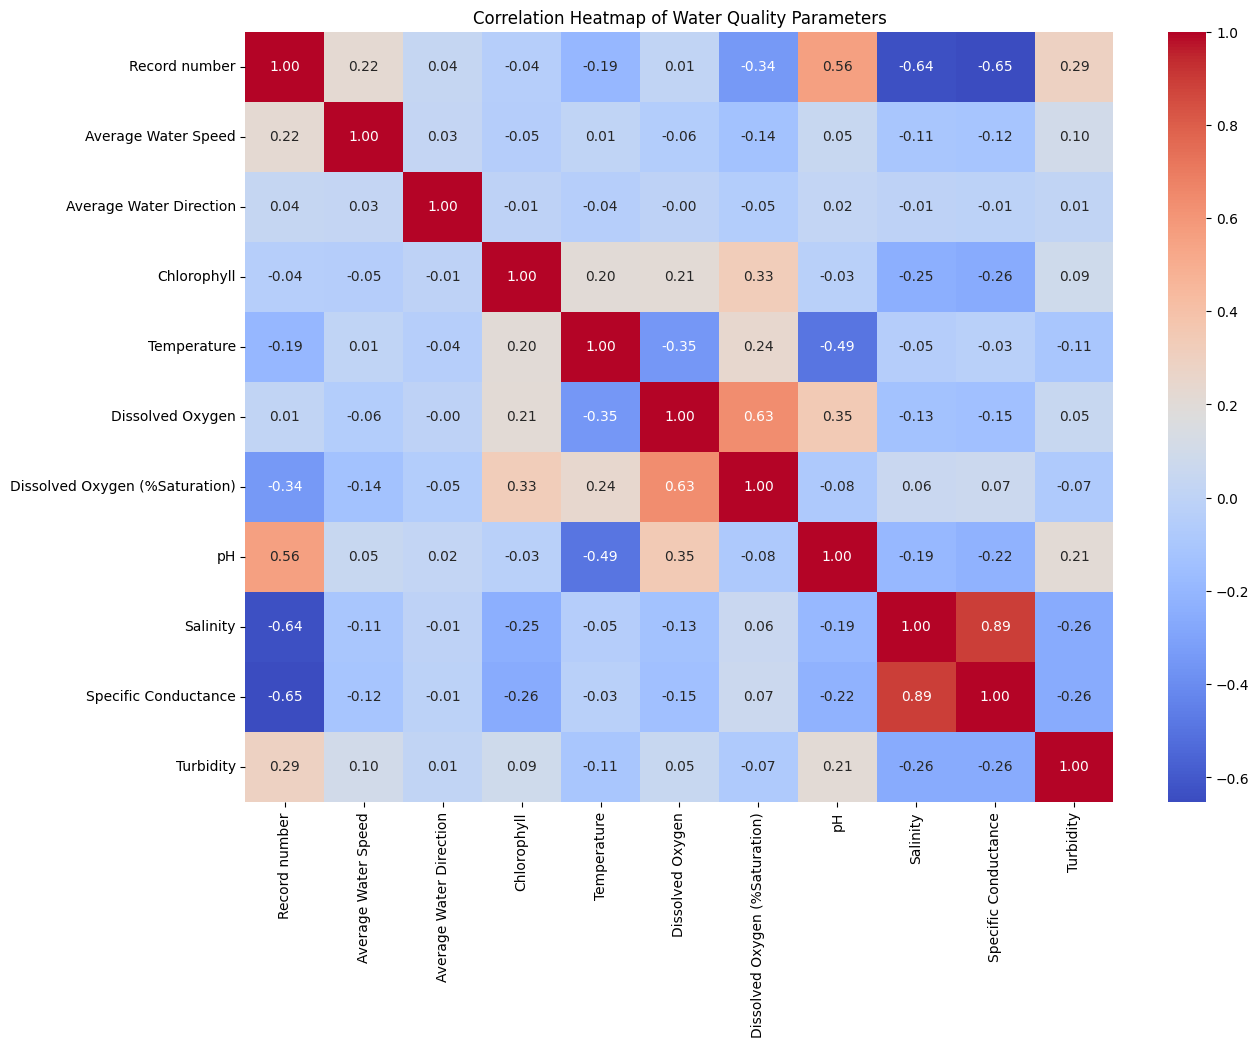

In [19]:
plt.figure(figsize=(14, 10))
correlation_matrix = naive_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

In [20]:
water_data=data.copy()
#Using linear interpolation to fill in NaN values
water_data= water_data.interpolate(method='linear')

# Resample the data to a consistent frequency (e.g., 30min)
water_data_resampled = water_data.resample('30T').mean()

<ipython-input-20-a110f92a3f2f>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  water_data_resampled = water_data.resample('30T').mean()


In [21]:
print(f'Samples from {data.index.min()} collected at every 30 minutes to {data.index.max()} is present in the dataset')

Samples from 2023-08-04 23:00:00 collected at every 30 minutes to 2024-06-27 09:00:00 is present in the dataset


In [22]:
missing_values=water_data_resampled[water_data_resampled.isna().any(axis=1)]

In [23]:
water_data_resampled.shape

(15717, 11)

In [24]:
water_data_resampled.head(10)

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2023-08-04 23:00:00,1470.750000,2.771750,143.78675,1.70275,19.959750,7.440250,100.644250,8.169,35.221250,53.270500,2.041500
2023-08-04 23:30:00,1471.333333,3.308667,176.67400,1.94100,19.932667,7.436333,100.545333,8.168,35.226333,53.277333,1.972333
2023-08-05 00:00:00,1475.000000,9.138000,52.00500,1.44300,19.822000,7.459000,100.667000,8.159,35.271000,53.337000,2.033000
2023-08-05 00:30:00,1476.000000,2.982000,93.11700,1.43300,19.804000,7.446000,100.471000,8.166,35.273000,53.339000,1.995000
2023-08-05 01:00:00,1477.000000,9.851000,53.06200,1.49900,19.770000,7.454000,100.515000,8.168,35.283000,53.353000,1.973000
2023-08-05 01:30:00,1478.000000,3.370000,318.48900,1.08300,19.741000,7.447000,100.371000,8.167,35.290000,53.362000,2.014000
2023-08-05 02:00:00,1479.000000,0.283000,324.38500,1.00100,19.712000,7.426000,100.038000,8.170,35.292000,53.365000,1.845000
2023-08-05 02:30:00,1480.000000,4.989000,166.41000,1.43500,19.711000,7.404000,99.745000,8.169,35.290000,53.363000,1.861000
2023-08-05 03:00:00,1481.000000,1.965000,6.22600,1.17600,19.703000,7.198000,96.958000,8.170,35.293000,53.366000,2.397000


In [25]:
missing_values.head()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2024-04-11 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-11 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-11 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-11 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-11 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
water_data_resampled=water_data_resampled.reset_index()

In [27]:
start_timestamp='2023-08-04 23:00:00'
df=water_data_resampled.copy()
water_data_resampled.dropna(inplace=True)
timestamps=pd.date_range(start=start_timestamp, periods=len(water_data_resampled), freq='30T')
water_data_resampled['Timestamp']=timestamps
water_data_resampled.set_index('Timestamp',inplace=True)

<ipython-input-27-c004a3d71f08>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps=pd.date_range(start=start_timestamp, periods=len(water_data_resampled), freq='30T')


In [28]:
water_data_resampled=water_data_resampled.resample('H').mean()

<ipython-input-28-aaa2989d42f9>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  water_data_resampled=water_data_resampled.resample('H').mean()


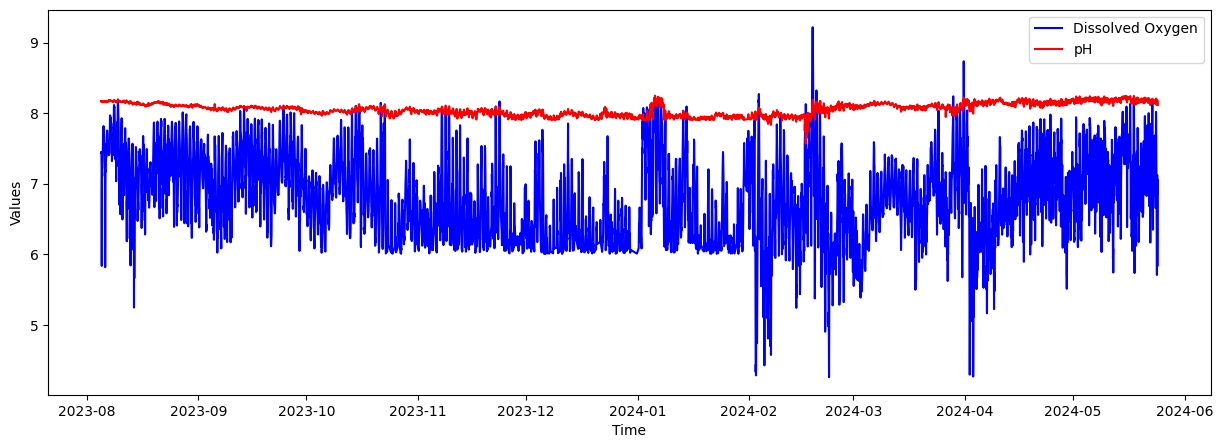

In [29]:

#Visualise the resampled data
plt.figure(figsize=(15,5))
plt.plot(water_data_resampled.index,water_data_resampled['Dissolved Oxygen'],color="blue",label="Dissolved Oxygen")
plt.plot(water_data_resampled.index,water_data_resampled['pH'],color="red",label="pH")
plt.legend()
plt.ylabel("Values")
plt.xlabel("Time")
plt.show()

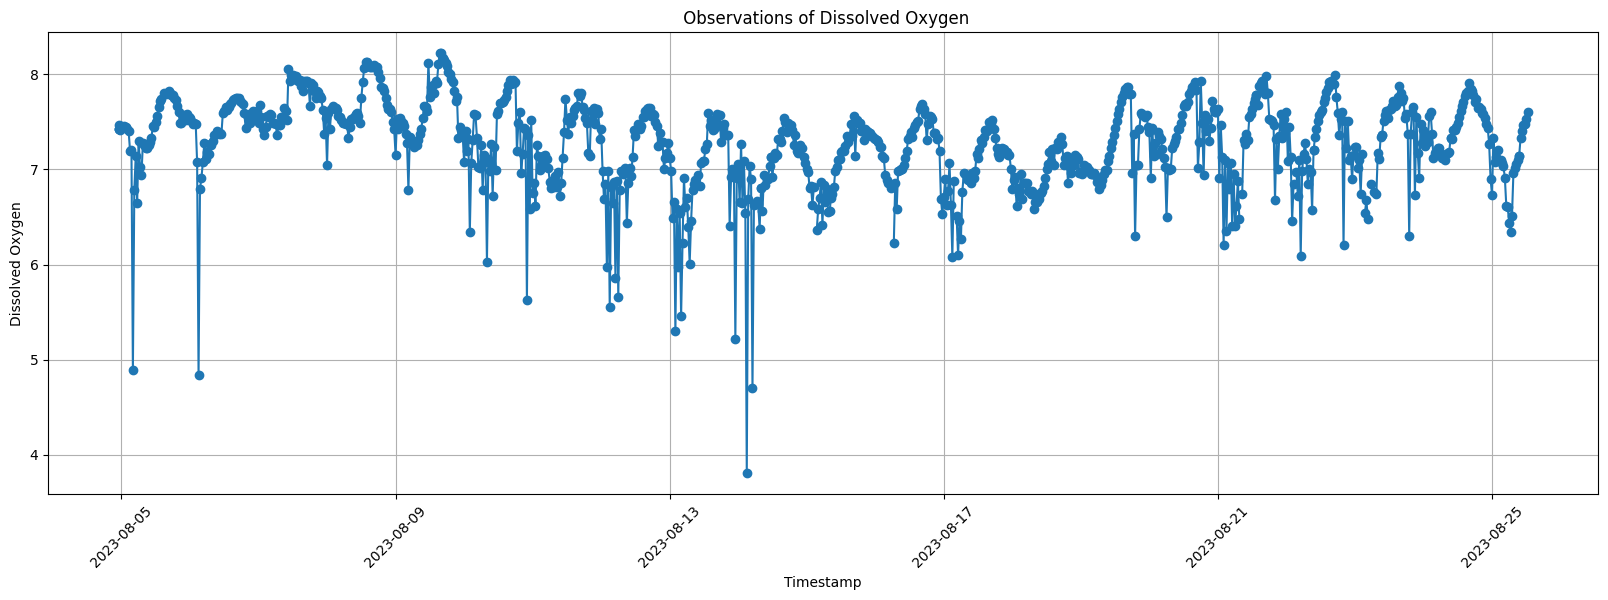

In [30]:
subset = data.iloc[:1000]

# Plot the selected subset
plt.figure(figsize=(20, 6))
plt.plot(subset.index, subset['Dissolved Oxygen'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Dissolved Oxygen')
plt.title(' Observations of Dissolved Oxygen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

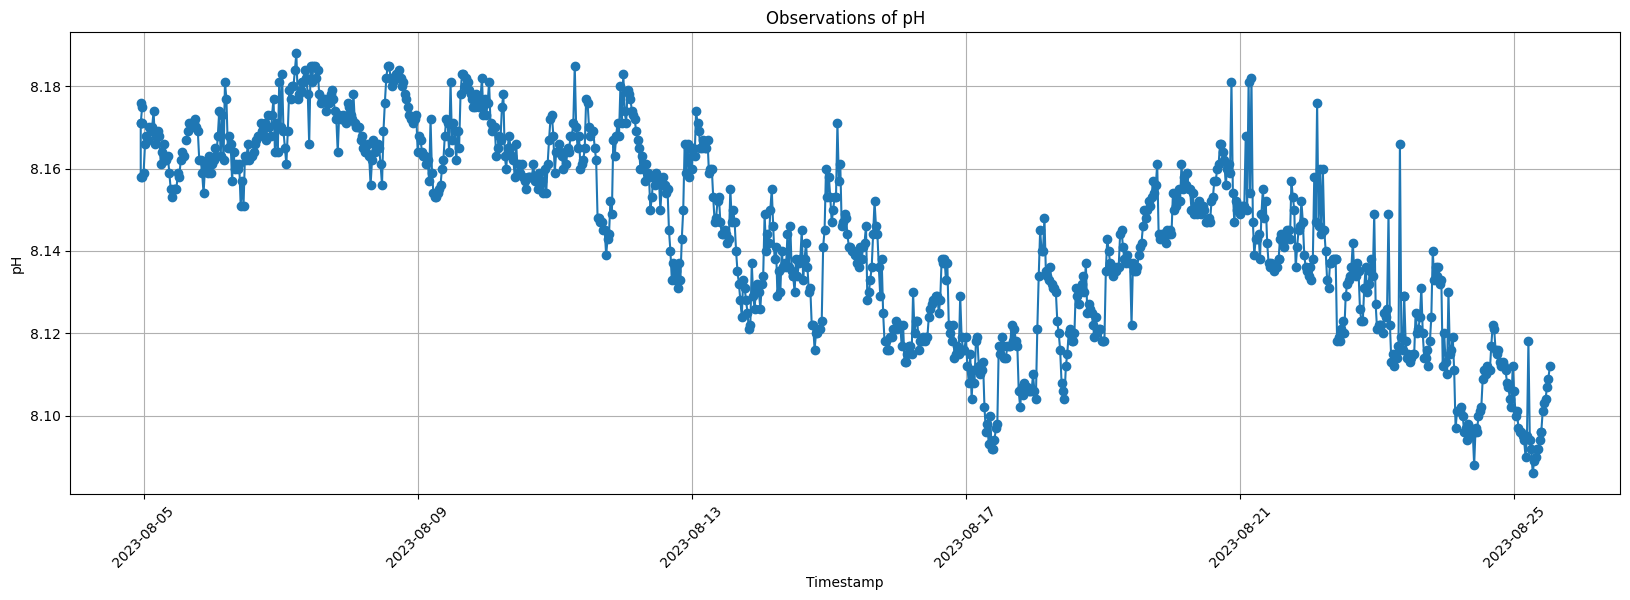

In [31]:
subset = data.iloc[:1000]

# Plot the selected subset
plt.figure(figsize=(20, 6))
plt.plot(subset.index, subset['pH'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('pH')
plt.title('Observations of pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [32]:
dissolved_oxygen = water_data_resampled['Dissolved Oxygen']
pH = water_data_resampled['pH']

from statsmodels.tsa.seasonal import STL

stl_model = STL(dissolved_oxygen, period=23)
results = stl_model.fit()

# Access the trend, seasonal, and residual components
trend_do = results.trend
seasonal_do = results.seasonal
residual_do = results.resid

In [33]:
stl_model_ph = STL(pH, period=23)
results_ph = stl_model_ph.fit()

# Access the trend, seasonal, and residual components
trend_ph = results_ph.trend
seasonal_ph = results_ph.seasonal
residual_ph = results_ph.resid

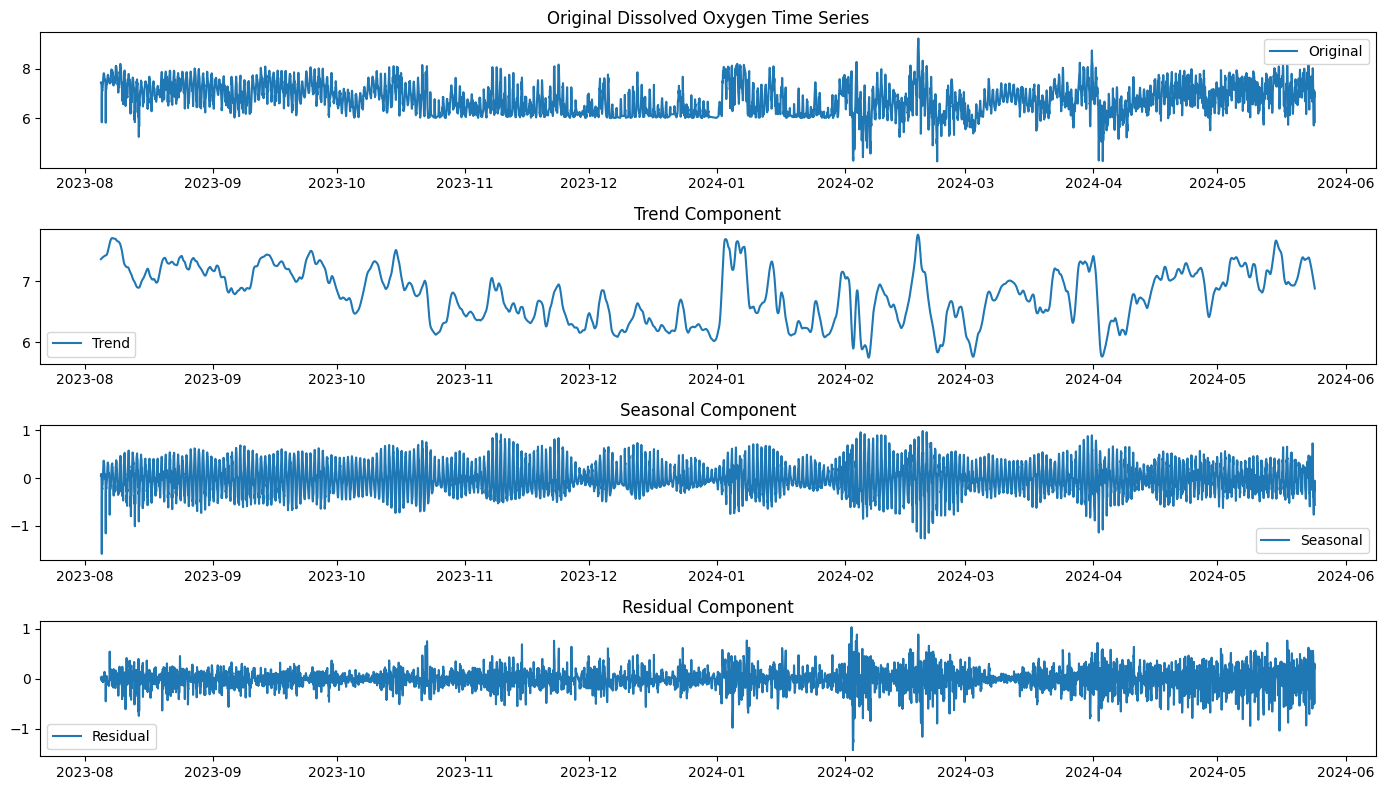

In [34]:
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(dissolved_oxygen, label='Original')
plt.legend(loc='best')
plt.title('Original Dissolved Oxygen Time Series')

plt.subplot(412)
plt.plot(trend_do, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal_do, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual_do, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

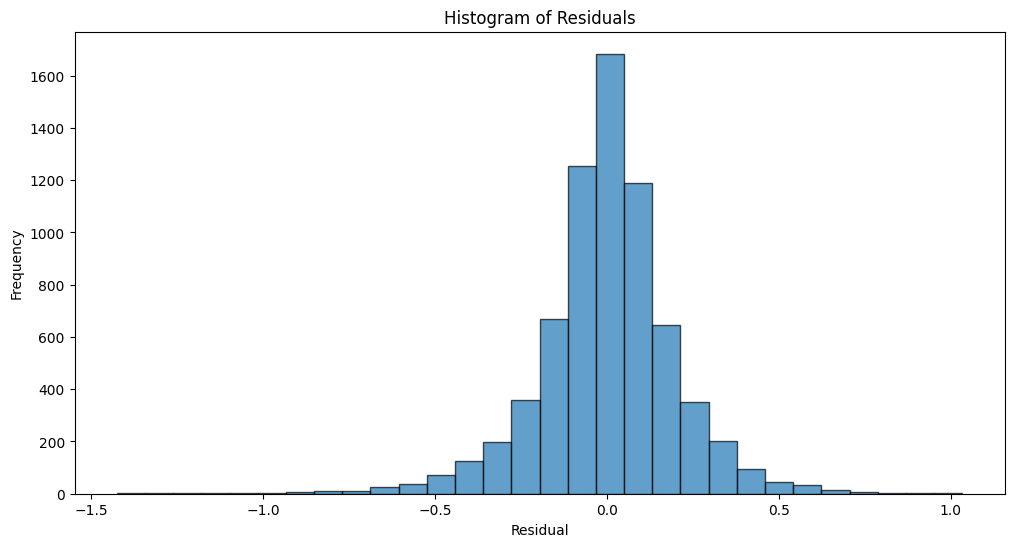

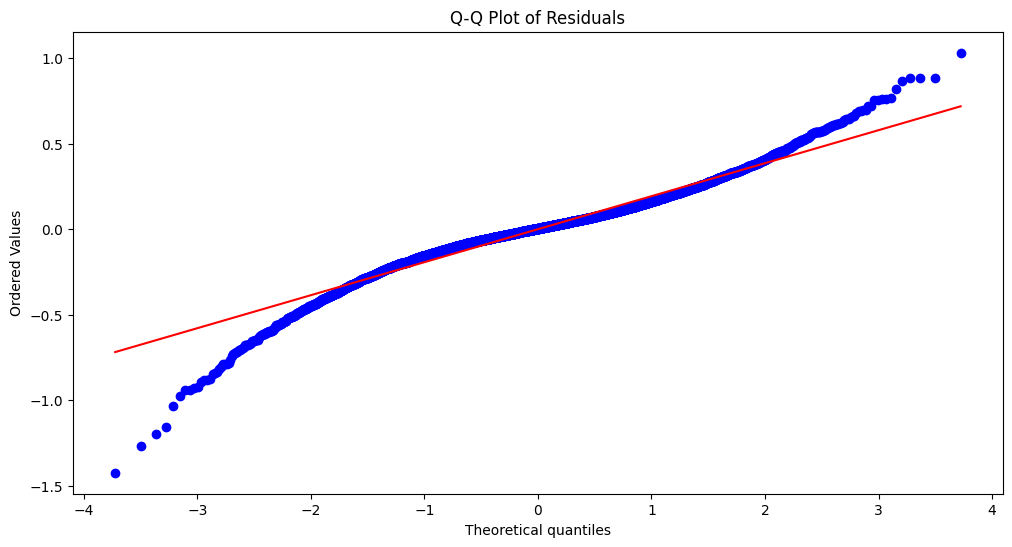

In [35]:
import scipy.stats as stats

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(residual_do, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(12, 6))
stats.probplot(residual_do, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


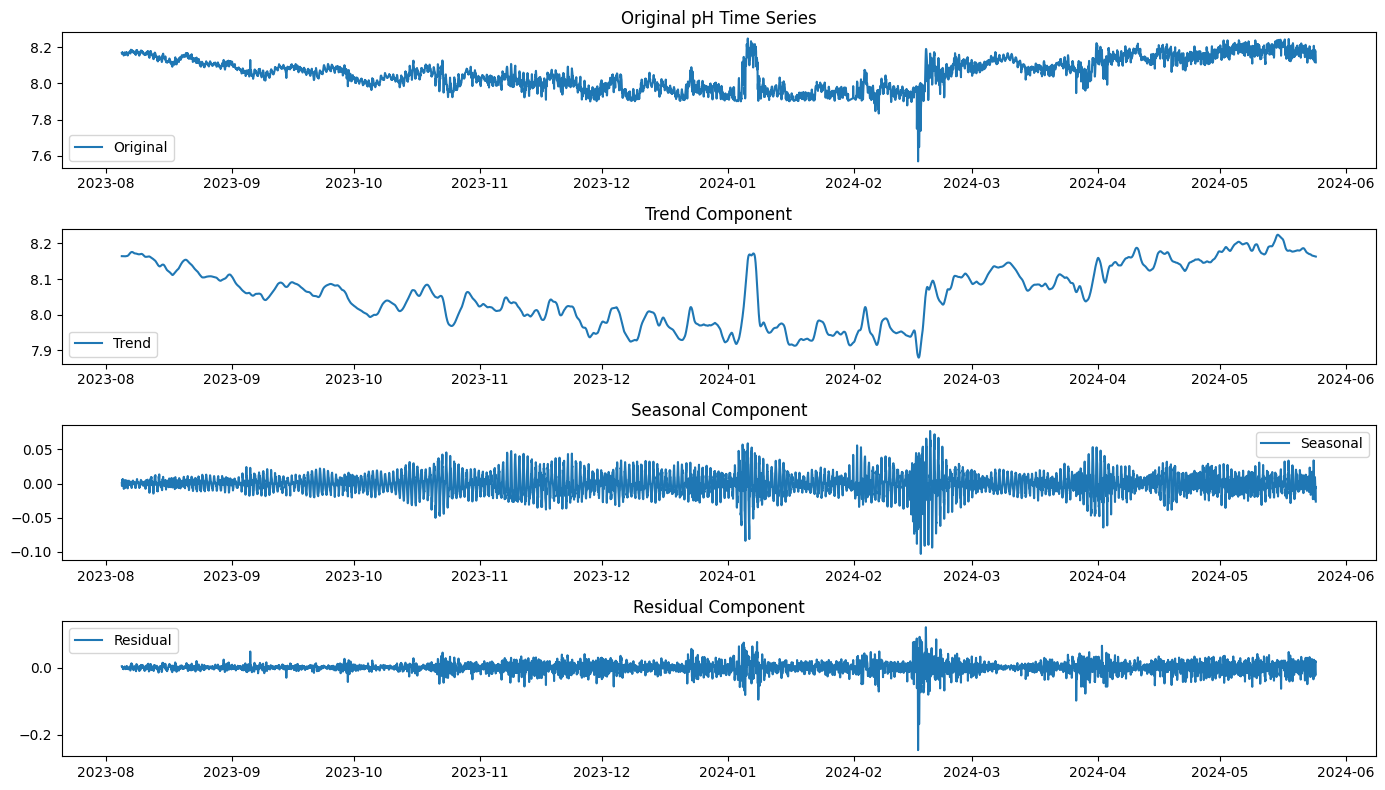

In [36]:
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(pH, label='Original')
plt.legend(loc='best')
plt.title('Original pH Time Series')

plt.subplot(412)
plt.plot(trend_ph, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal_ph, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual_ph, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

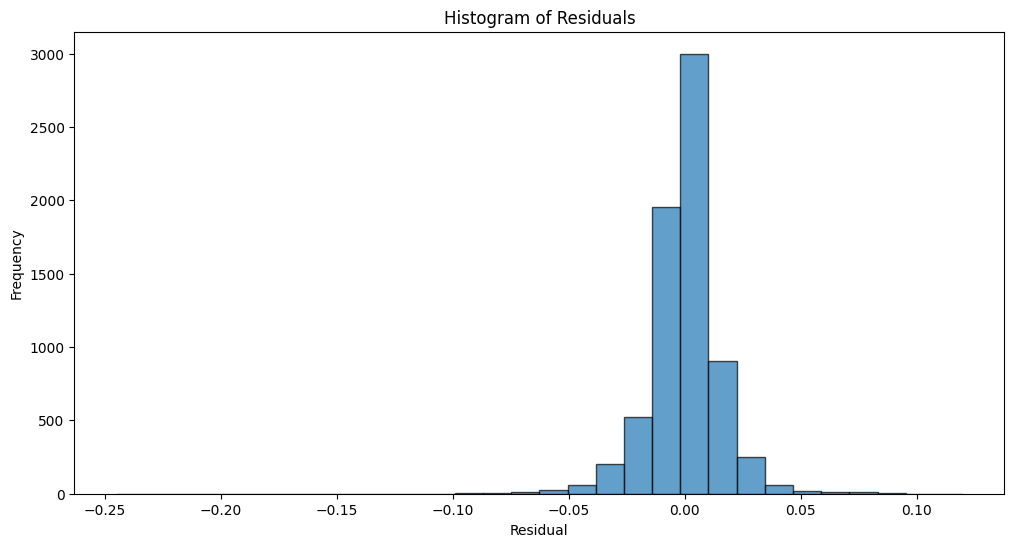

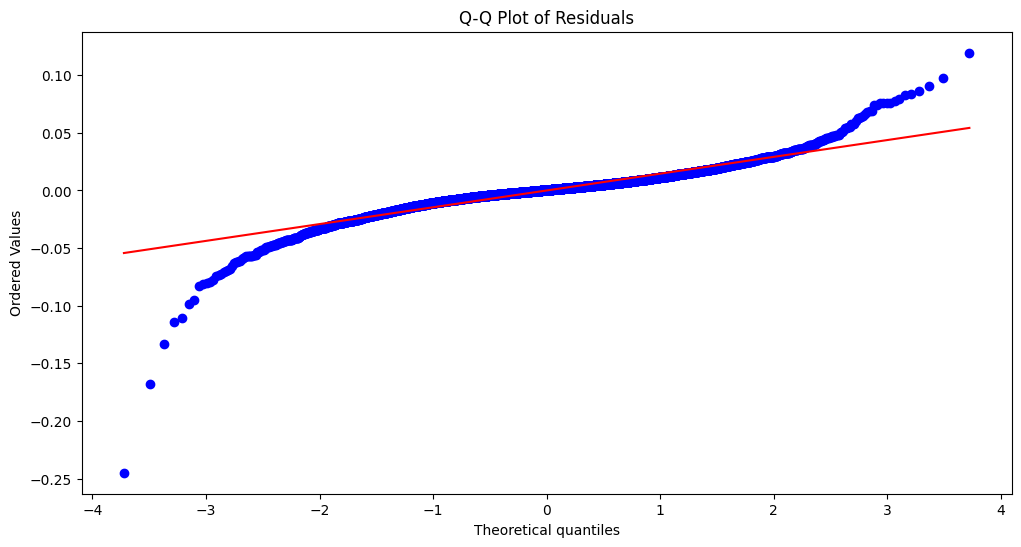

In [37]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(residual_ph, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(12, 6))
stats.probplot(residual_ph, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


DICKEY-FUELLER TEST

In [38]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(water_data_resampled['Dissolved Oxygen'], autolag='AIC')
dftest2 = adfuller(water_data_resampled['pH'], autolag='AIC')

In [39]:
dftest[1],dftest2[1]

(6.391532840215245e-09, 0.006675401963221072)

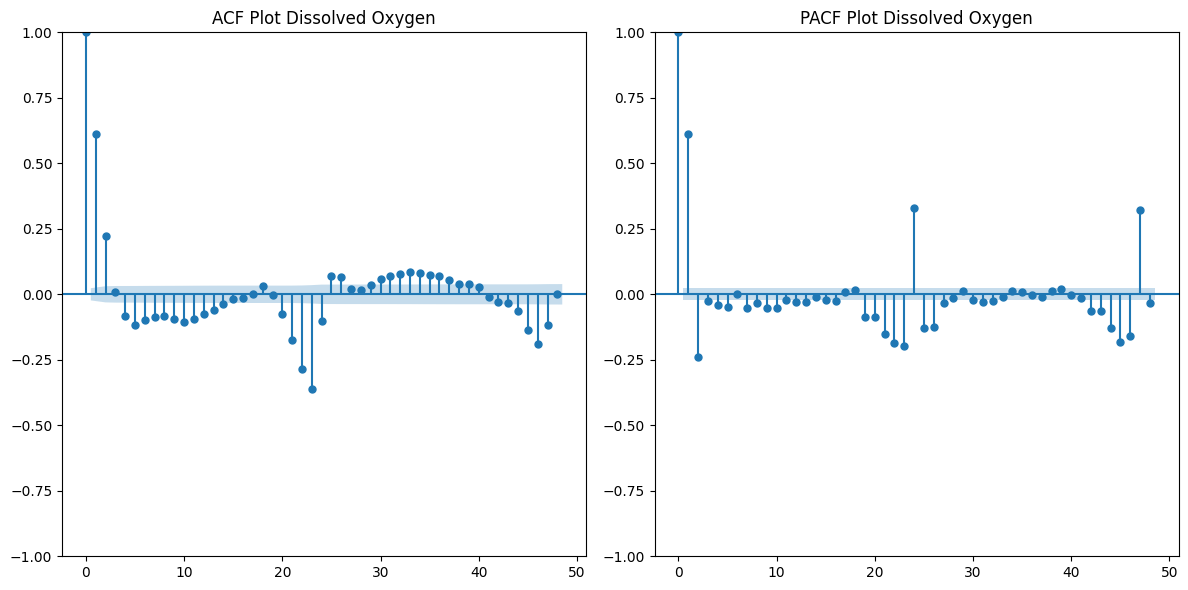

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(residual_do, lags=48, ax=plt.gca())
plt.title('ACF Plot Dissolved Oxygen')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(residual_do, lags=48, ax=plt.gca())
plt.title('PACF Plot Dissolved Oxygen')

plt.tight_layout()
plt.show()


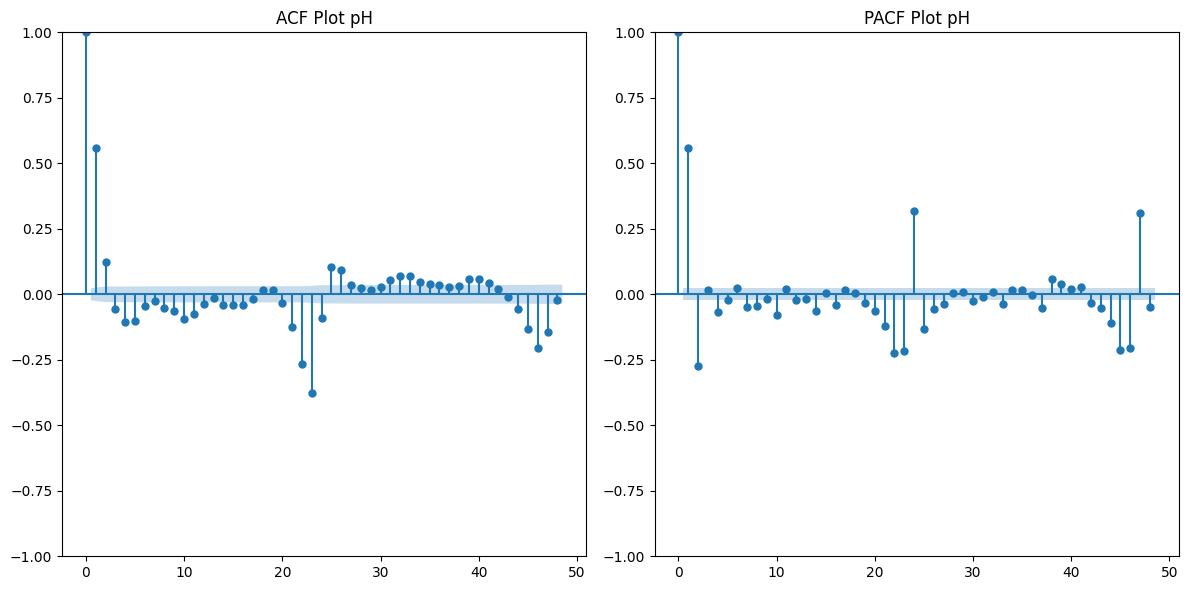

In [41]:
series = residual_ph

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(series, lags=48, ax=plt.gca())
plt.title('ACF Plot pH')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(series, lags=48, ax=plt.gca())
plt.title('PACF Plot pH')

plt.tight_layout()
plt.show()


In [42]:
split_index = len(water_data_resampled) - 240
train = water_data_resampled.iloc[:split_index]
test = water_data_resampled.iloc[split_index:]

In [43]:
train.tail()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2024-05-14 09:00:00,30889.50,14.593500,229.721833,1.572833,17.051000,7.160667,88.504667,8.200000,29.293167,45.177833,2.762667
2024-05-14 10:00:00,30895.50,9.190833,226.110167,2.014833,17.033793,7.256833,89.556833,8.210167,29.306167,45.196667,2.641500
2024-05-14 11:00:00,30901.50,13.645167,164.031667,2.136167,17.031817,7.296500,89.982833,8.209667,29.307667,45.199000,3.090000
2024-05-14 12:00:00,30907.50,15.524167,216.080000,2.312333,17.031671,7.529000,92.533333,8.221000,29.323167,45.223000,3.385333
2024-05-14 13:00:00,30914.25,13.195917,197.173500,2.353625,17.031506,7.694417,94.541208,8.231417,29.348042,45.257917,3.715917


In [44]:
len(test)

240

In [45]:
len(train)

6807

SARIMAX

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
import random
random.seed(42)

In [59]:
import itertools
from multiprocessing import Pool
import multiprocessing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the parameter ranges
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [24]

parameters = list(itertools.product(p, d, q, P, D, Q))

def fit_sarimax(param):
    try:
        model = SARIMAX(
            train['Dissolved Oxygen'],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], s[0]),
            exog=train[['Temperature', 'Chlorophyll']],
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
        return (param, results.aic)
    except Exception as e:
        print(f"Error fitting model with parameters {param}: {e}")
        return (param, float('inf'))

if __name__ == '__main__':
    num_cores = multiprocessing.cpu_count()  # Get the number of CPU cores
    chunk_size = 50  # Adjust based on available memory
    results = []  # Initialize results list

    for i in range(0, len(parameters), chunk_size):
        chunk = parameters[i:i + chunk_size]
        with Pool(processes=num_cores) as pool:
            results_chunk = pool.map(fit_sarimax, chunk)
            results.extend(results_chunk)

    # Find the best parameters
    best_params, best_aic = min(results, key=lambda x: x[1])
    print(f'Best SARIMA parameters: {best_params}, Best AIC: {best_aic}')


Best SARIMA parameters: (1, 0, 1, 0, 1, 1), Best AIC: -2925.35048511004


In [ ]:
# Define the parameter ranges
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [24]

parameters = list(itertools.product(p, d, q, P, D, Q))

def fit_sarimax(param):
    try:
        model = SARIMAX(
            train['pH'],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], s[0]),
            exog=train[['Dissolved Oxygen','Salinity']],
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
        return (param, results.aic)
    except Exception as e:
        print(f"Error fitting model with parameters {param}: {e}")
        return (param, float('inf'))

if __name__ == '__main__':
    num_cores = multiprocessing.cpu_count()  # Get the number of CPU cores
    chunk_size = 50  # Adjust based on available memory
    results = []  # Initialize results list

    for i in range(0, len(parameters), chunk_size):
        chunk = parameters[i:i + chunk_size]
        with Pool(processes=num_cores) as pool:
            results_chunk = pool.map(fit_sarimax, chunk)
            results.extend(results_chunk)

    # Find the best parameters
    best_params, best_aic = min(results, key=lambda x: x[1])
    print(f'Best SARIMA parameters: {best_params}, Best AIC: {best_aic}')


Best SARIMA parameters: (1, 1, 1, 0, 0, 0), Best AIC: -31799.596985612934


In [48]:
model_DO = SARIMAX(train['Dissolved Oxygen'],

                   order=(1, 0, 1),

                   seasonal_order=(0, 1, 1, 24),
                   exog=train[['Temperature', 'Chlorophyll']],

                   enforce_stationarity=False,

                   enforce_invertibility=False)
result_DO=model_DO.fit()
result_DO.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Temperature,-0.0953,0.006,-15.909,0.000,-0.107,-0.084
Chlorophyll,0.0926,0.002,43.370,0.000,0.088,0.097
ar.L1,0.8431,0.005,154.504,0.000,0.832,0.854
ma.L1,0.0761,0.008,9.436,0.000,0.060,0.092
ma.S.L24,-0.9640,0.003,-294.805,0.000,-0.970,-0.958
sigma2,0.0376,0.000,108.373,0.000,0.037,0.038


In [49]:
model_ph=SARIMAX(train['pH'],order=(1,1,1),seasonal_order=(0,0,0,24), exog=train[['Dissolved Oxygen','Salinity']],enforce_stationarity=False, enforce_invertibility=False)
result_ph=model_ph.fit()
result_ph.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Dissolved Oxygen,0.0462,0.000,101.382,0.000,0.045,0.047
Salinity,0.0098,7.95e-05,123.555,0.000,0.010,0.010
ar.L1,0.7222,0.007,101.005,0.000,0.708,0.736
ma.L1,-0.9057,0.005,-168.530,0.000,-0.916,-0.895
sigma2,0.0002,1.29e-06,150.573,0.000,0.000,0.000


In [50]:
# Forecast future values using SARIMAX
forecast_steps = len(test)  # Number of steps to forecast
forecast_do_sarimax = result_DO.get_forecast(steps=forecast_steps,exog=test[['Temperature', 'Chlorophyll']])
forecast_do_sarimax_ci = forecast_do_sarimax.conf_int()


In [51]:
# Forecast future values using SARIMAX
forecast_steps = len(test)  # Number of steps to forecast
forecast_ph_sarimax = result_ph.get_forecast(steps=forecast_steps,exog=test[['Dissolved Oxygen','Salinity']])
forecast_ph_sarimax_ci = forecast_ph_sarimax.conf_int()


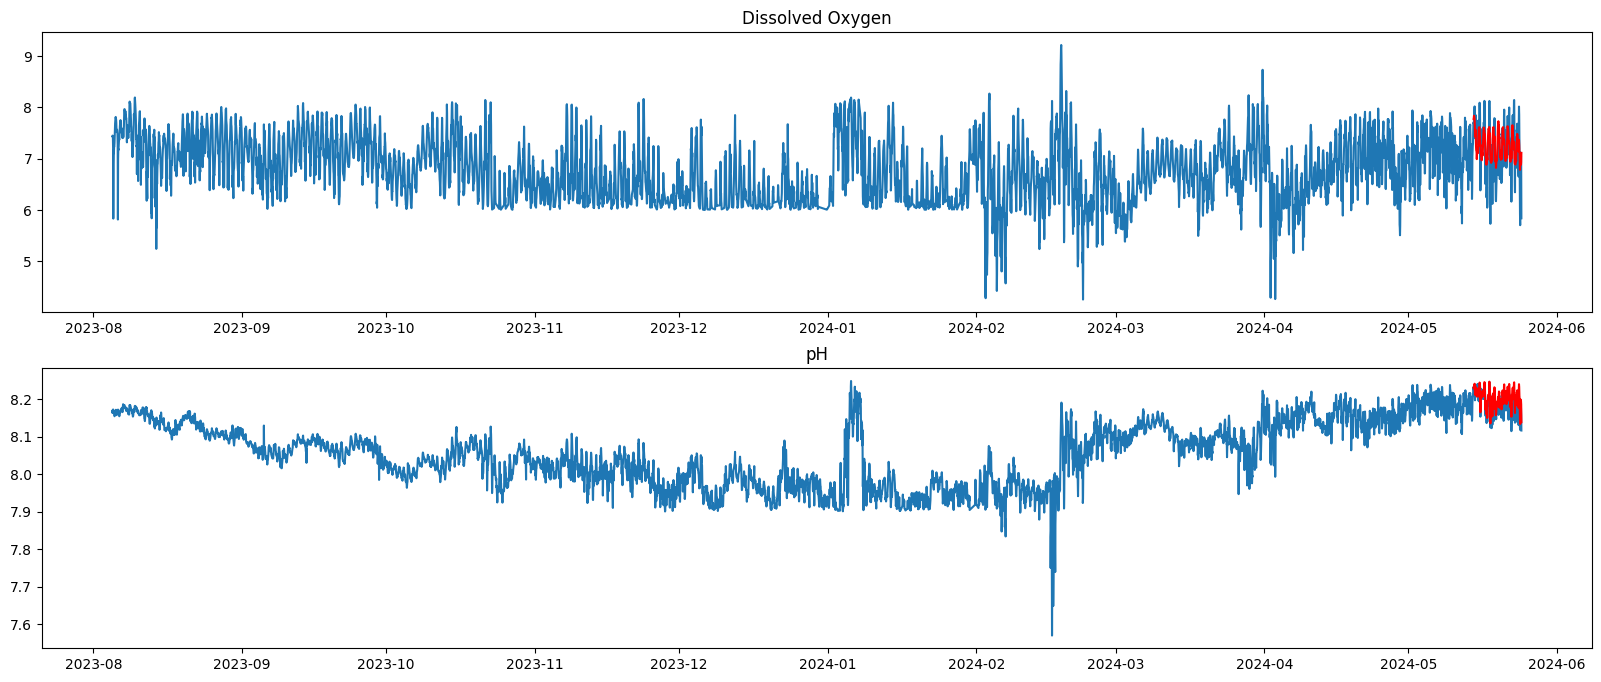

In [52]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
plt.plot(water_data_resampled['Dissolved Oxygen'].index, water_data_resampled['Dissolved Oxygen'], label='Observed')
plt.title("Dissolved Oxygen")
plt.plot(forecast_do_sarimax.predicted_mean.index, forecast_do_sarimax.predicted_mean, color='r', label='SARIMAX Forecast')

plt.subplot(212)
plt.plot(water_data_resampled['pH'].index, water_data_resampled['pH'], label='Observed')
plt.title("pH")
plt.plot(forecast_ph_sarimax.predicted_mean.index, forecast_ph_sarimax.predicted_mean, color='r', label='SARIMAX Forecast')

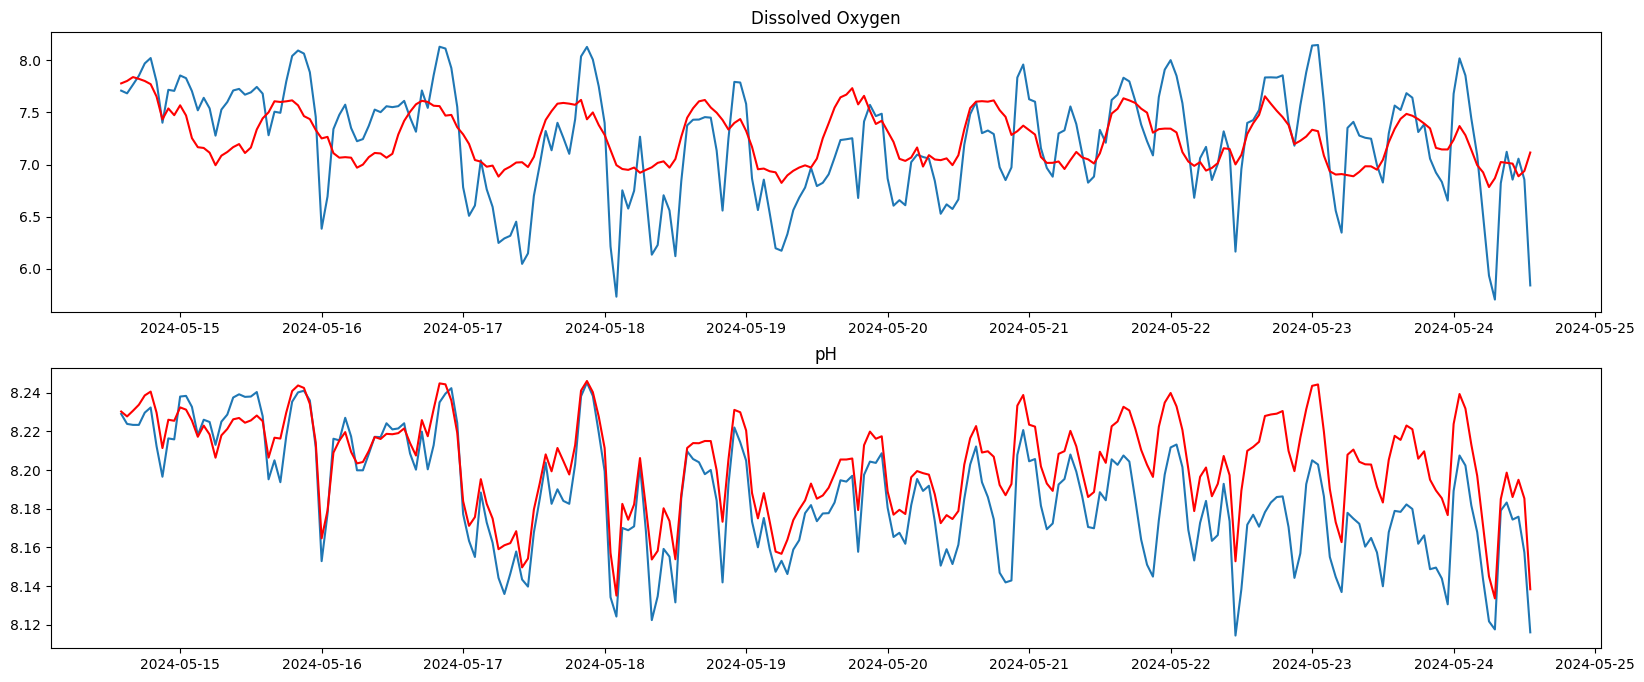

In [53]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
plt.plot(test['Dissolved Oxygen'].index, test['Dissolved Oxygen'], label='Observed')
plt.title("Dissolved Oxygen")
plt.plot(forecast_do_sarimax.predicted_mean.index, forecast_do_sarimax.predicted_mean, color='r', label='SARIMAX Forecast')

plt.subplot(212)
plt.plot(test['pH'].index, test['pH'], label='Observed')
plt.title("pH")
plt.plot(forecast_ph_sarimax.predicted_mean.index, forecast_ph_sarimax.predicted_mean, color='r', label='SARIMAX Forecast 3pmt')

PROPHET


In [63]:
from prophet import Prophet


df_DO=train.reset_index()
df_DO = df_DO.rename(columns={'Timestamp': 'ds',
                        'Dissolved Oxygen': 'y'})

model_do_prophet = Prophet(interval_width=0.95,daily_seasonality=True)
model_do_prophet.fit(df_DO)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8sqipqbb/zusa9ium.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8sqipqbb/5kpbpha2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11454', 'data', 'file=/tmp/tmp8sqipqbb/zusa9ium.json', 'init=/tmp/tmp8sqipqbb/5kpbpha2.json', 'output', 'file=/tmp/tmp8sqipqbb/prophet_models6hd981z/prophet_model-20241008021827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
df_ph=train.reset_index()
df_ph = df_ph.rename(columns={'Timestamp': 'ds',
                        'pH': 'y'})

model_pH_prophet = Prophet(interval_width=0.95)
model_pH_prophet.fit(df_ph)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8sqipqbb/a9vnq1et.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8sqipqbb/_498j015.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14786', 'data', 'file=/tmp/tmp8sqipqbb/a9vnq1et.json', 'init=/tmp/tmp8sqipqbb/_498j015.json', 'output', 'file=/tmp/tmp8sqipqbb/prophet_model5osodk45/prophet_model-20241008021834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
future_df = test.reset_index()
future_df=future_df.rename(columns={'Timestamp': 'ds'})
future_df.head()

,ds,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
0,2024-05-14 14:00:00,30920.5,10.059000,187.738833,2.120667,17.031354,7.708333,94.662833,8.229000,29.349000,45.259500,3.227667
1,2024-05-14 15:00:00,30926.5,11.191167,178.876833,1.769167,17.031207,7.682500,94.476667,8.223833,29.348667,45.258000,3.255500
2,2024-05-14 16:00:00,30932.5,5.364167,193.229667,1.632000,17.031061,7.765667,95.815667,8.223333,29.351500,45.260000,3.181833
3,2024-05-14 17:00:00,30938.5,8.425500,153.760167,1.644333,17.031500,7.851000,97.030167,8.223333,29.336833,45.238500,3.223000
4,2024-05-14 18:00:00,30944.5,6.946667,189.680000,1.950000,17.103667,7.969167,98.616167,8.229667,29.322500,45.217833,3.466000


In [66]:
forecast_do_prophet = model_do_prophet.predict(future_df)
forecast_pH_prophet = model_pH_prophet.predict(future_df)

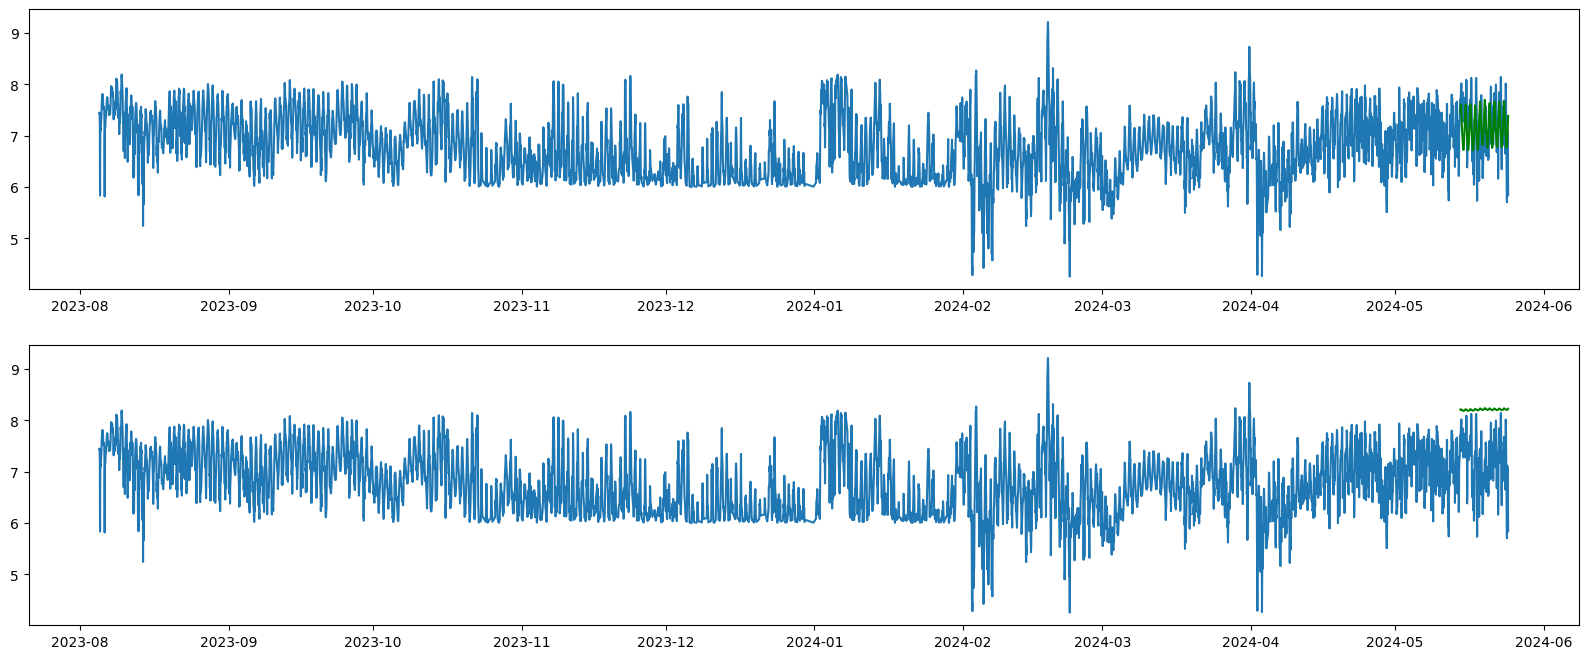

In [67]:
plt.figure(figsize=(20, 8))

plt.subplot(211)

plt.plot(dissolved_oxygen.index, dissolved_oxygen, label='Observed')
plt.plot(forecast_do_prophet['ds'], forecast_do_prophet['yhat'], color='g', label='Prophet Forecast')

plt.subplot(212)

plt.plot(dissolved_oxygen.index, dissolved_oxygen, label='Observed')
plt.plot(forecast_pH_prophet['ds'], forecast_pH_prophet['yhat'], color='g', label='Prophet Forecast')

In [68]:
import numpy as np
def calculate_accuracy(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse
# Evaluate the models
mae_do, rmse_do = calculate_accuracy(test['Dissolved Oxygen'], forecast_do_sarimax.predicted_mean)
mae_ph, rmse_ph = calculate_accuracy(test['pH'], forecast_ph_sarimax.predicted_mean)

mae_do1, rmse_do1 = calculate_accuracy(test['Dissolved Oxygen'], forecast_do_prophet['yhat'])
mae_ph1, rmse_ph1 = calculate_accuracy(test['pH'], forecast_pH_prophet['yhat'])

print("SARIMAX")
print("Dissolved Oxygen:")
print("MAE:", mae_do)
print("RMSE:", rmse_do)

print("\npH:")
print("MAE:", mae_ph)
print("RMSE:", rmse_ph)

print("\nPROPHET")
print("Dissolved Oxygen:")
print("MAE:", mae_do1)
print("RMSE:", rmse_do1)

print("\npH:")
print("MAE:", mae_ph1)
print("RMSE:", rmse_ph1)

SARIMAX
Dissolved Oxygen:
MAE: 0.3383464370568691
RMSE: 0.4153428372782966

pH:
MAE: 0.018741604376164196
RMSE: 0.023093675742629285

PROPHET
Dissolved Oxygen:
MAE: 0.4178097713662884
RMSE: 0.507793922020819

pH:
MAE: 0.03656257008569035
RMSE: 0.04266448620391898


In [60]:
mean_values = water_data_resampled.mean()

In [61]:
mean_values

,0
Record number,13499.926783
Average Water Speed,14.771949
Average Water Direction,175.709989
Chlorophyll,2.788814
Temperature,24.212107
Dissolved Oxygen,6.778896
Dissolved Oxygen (%Saturation),97.190526
pH,8.057509
Salinity,32.365702
Specific Conductance,49.137859


In [128]:
standard_values = {
    "Dissolved Oxygen": 7,
    "pH": 7,
    "Temperature": 24,
    "Chlorophyll": 5,
    "Salinity": 30
}


In [129]:
# Calculate the summation of 1/Sn for each parameter
summation_inv = sum(1 / sn for sn in standard_values.values())

# Calculate K
K = 1 / summation_inv

# Calculate weights for each parameter
weights_new = {
    parameter: K / standard_values[parameter] for parameter in standard_values
}


In [130]:
weights_new

{'Dissolved Oxygen': 0.25477707006369427,
 'pH': 0.25477707006369427,
 'Temperature': 0.07430997876857749,
 'Chlorophyll': 0.356687898089172,
 'Salinity': 0.059447983014861996}

In [140]:
Qi_values = pd.DataFrame()

# Calculate Qi for each parameter for each sample
for parameter in standard_values:
    standard_value = standard_values[parameter]
    # Calculate Qi for each sample (row) in the DataFrame
    Qi_values[parameter] = (abs(water_data_resampled[parameter] - mean_values[parameter]) /
                            abs(standard_value - mean_values[parameter]))*100

In [141]:
Qi_values

,Dissolved Oxygen,pH,Temperature,Chlorophyll,Salinity
Timestamp,,,,,
2023-08-04 23:00:00,298.228701,10.495518,2011.199166,43.729422,120.813603
2023-08-05 00:00:00,304.654786,9.928147,2074.001519,61.090014,122.851405
2023-08-05 01:00:00,303.750234,10.400956,2101.110449,67.738030,123.464331
2023-08-05 02:00:00,287.694444,10.590080,2121.854673,71.039425,123.654549
2023-08-05 03:00:00,190.907430,10.826484,2126.333539,70.428893,123.548872
...,...,...,...,...,...
2024-05-24 09:00:00,155.403782,11.882425,2497.686584,7.266964,126.447401
2024-05-24 10:00:00,34.721531,11.047129,2540.746564,6.466239,127.729613
2024-05-24 11:00:00,125.553581,11.188971,2608.715329,52.369204,129.307721


In [142]:
total_weight = sum(weights_new.values())
WQI = ((weights_new['Dissolved Oxygen'] * Qi_values['Dissolved Oxygen'] +
         weights_new['pH'] * Qi_values['pH'] +
         weights_new['Temperature'] * Qi_values['Temperature'] +
         weights_new['Chlorophyll'] * Qi_values['Chlorophyll'] +
         weights_new['Salinity'] * Qi_values['Salinity']) )

# Add WQI to the DataFrame
Qi_values['WQI'] = WQI

In [145]:
overall_wqi = Qi_values['WQI'].sum()/len(water_data_resampled)

In [146]:
overall_wqi ##Water is polluted

192.10765517985052